In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Reproducibility
np.random.seed(42)

# Simulated loan portfolio (100 loans)
n_loans = 100

data = {
    'Loan_ID': np.arange(1, n_loans+1),
    'Exposure_at_Default': np.random.uniform(1e5, 1e6, n_loans),
    'Credit_Rating': np.random.choice(['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC'], n_loans),
    'Interest_Rate': np.random.uniform(5, 15, n_loans)
}

df = pd.DataFrame(data)
df.head()

,Loan_ID,Exposure_at_Default,Credit_Rating,Interest_Rate
0,1,437086.106963,CCC,5.808533
1,2,955642.875769,CCC,8.696545
2,3,758794.547630,AAA,7.421599
3,4,638792.635777,BBB,13.031398
4,5,240416.776398,BB,9.703006


In [3]:
pd_table = {
    'AAA': 0.0001,
    'AA': 0.0005,
    'A': 0.001,
    'BBB': 0.005,
    'BB': 0.02,
    'B': 0.05,
    'CCC': 0.15
}

df['PD'] = df['Credit_Rating'].map(pd_table)
df.head()


,Loan_ID,Exposure_at_Default,Credit_Rating,Interest_Rate,PD
0,1,437086.106963,CCC,5.808533,0.1500
1,2,955642.875769,CCC,8.696545,0.1500
2,3,758794.547630,AAA,7.421599,0.0001
3,4,638792.635777,BBB,13.031398,0.0050
4,5,240416.776398,BB,9.703006,0.0200


In [4]:
# Assume random LGD between 20%–60%
df['LGD'] = np.random.uniform(0.2, 0.6, n_loans)
df['EAD'] = df['Exposure_at_Default']


In [6]:
df['Expected_Loss'] = df['PD'] * df['LGD'] * df['EAD']
total_EL = df['Expected_Loss'].sum()

print(f"Total Expected Loss of Portfolio: ₹{total_EL:,.2f}")


Total Expected Loss of Portfolio: ₹739,456.97


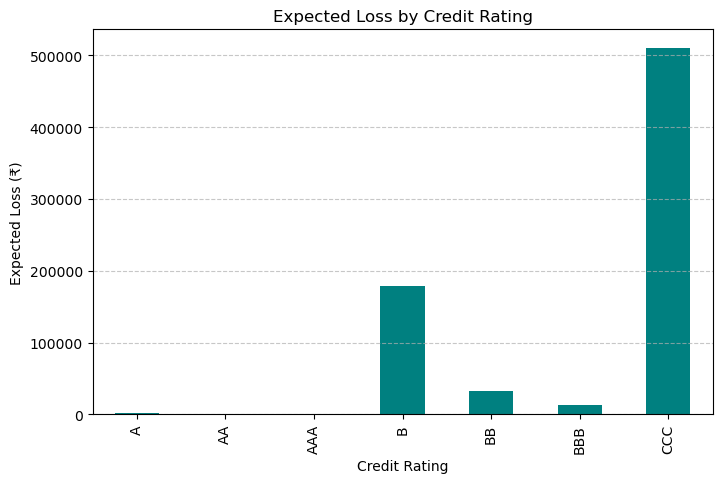

In [13]:
rating_el = df.groupby('Credit_Rating')['Expected_Loss'].sum().sort_index()

plt.figure(figsize=(8,5))
rating_el.plot(kind='bar', color='teal')
plt.title('Expected Loss by Credit Rating')
plt.ylabel('Expected Loss (₹)')
plt.xlabel('Credit Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


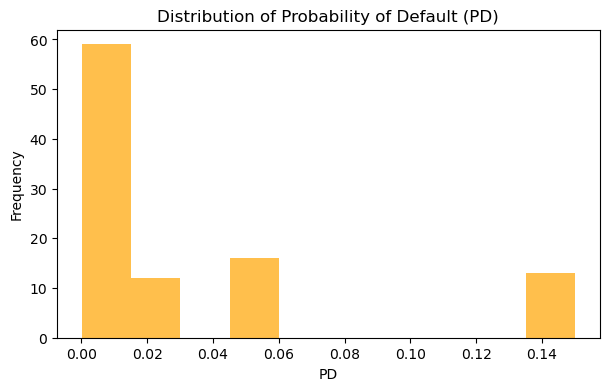

In [14]:
plt.figure(figsize=(7,4))
plt.hist(df['PD'], bins=10, color='orange', alpha=0.7)
plt.title('Distribution of Probability of Default (PD)')
plt.xlabel('PD')
plt.ylabel('Frequency')
plt.show()
